Present dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W

In [20]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [21]:
df=pd.read_csv('baseball.csv')

In [22]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


present dataset is a regression problem as the output has continuos value.

In [23]:
df.shape

(30, 17)

There are 30 rows and 17 columns

In [24]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [25]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

As expected the since the values are numeric in each column, the datatypes are int and float.

In [26]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in the dataset

In [27]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Mean is greater than median in column H,HR,CG,SV,E which indicates right skewness.
Mean is less tham median in column-ER,RA,SO,BB indicating left skewness.
Also the count has same value of 30, indicating no null values in the data

<AxesSubplot:ylabel='Frequency'>

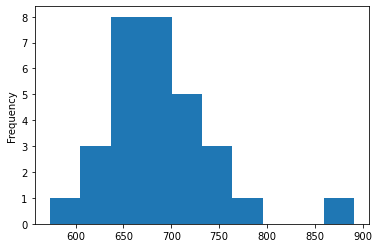

In [36]:
df['R'].plot.hist()

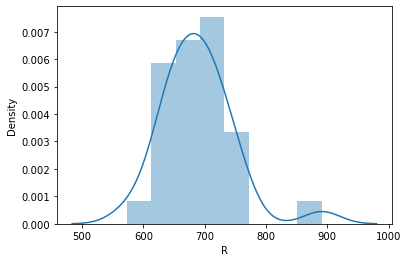

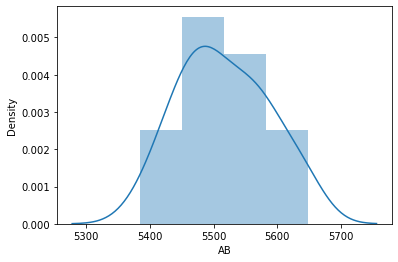

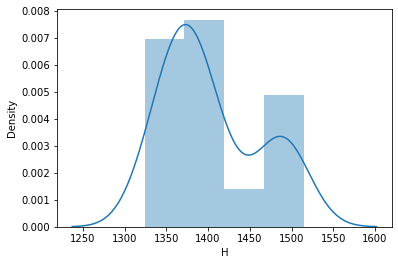

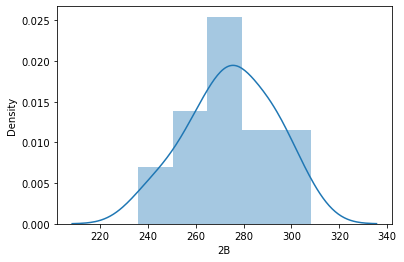

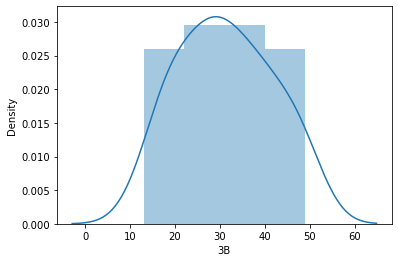

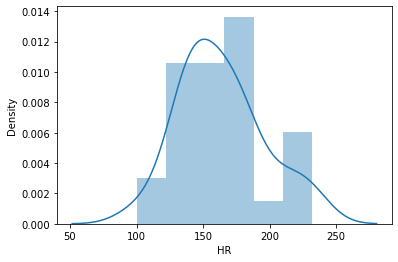

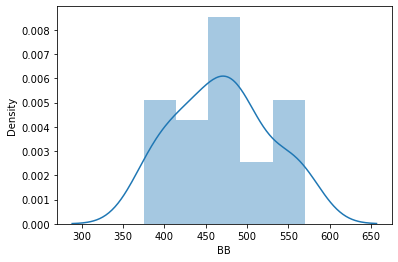

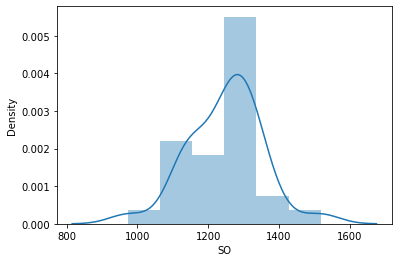

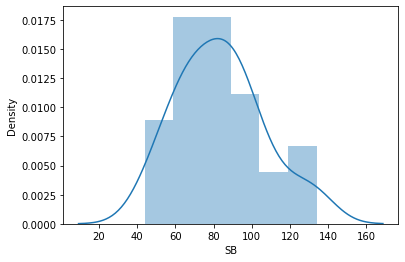

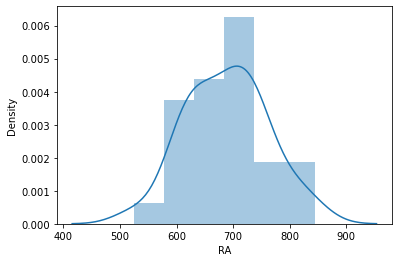

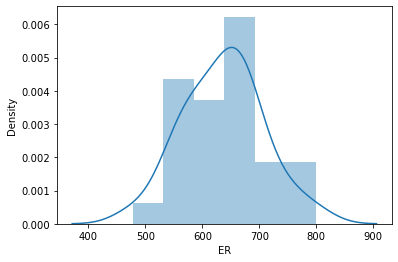

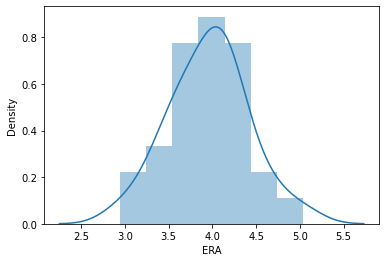

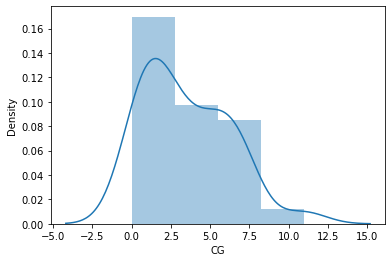

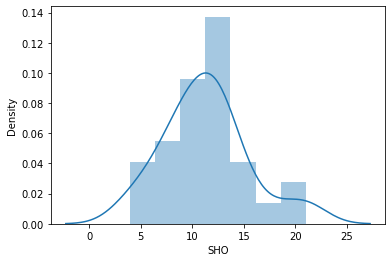

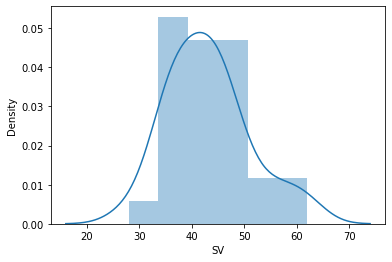

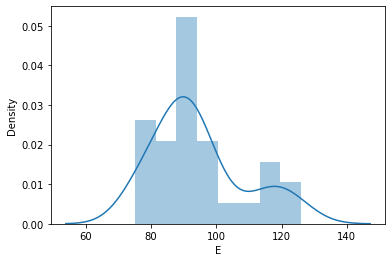

In [30]:
#to check the distribution of all the columns simultaneously
columns=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for i in df[columns]:
    plt.figure()
    sb.distplot(df[i])

Data distribution was seen with the help of distplot.Data was seen to be normally distributed in most of the columns.Only column E,CG,H were not normally distributed.

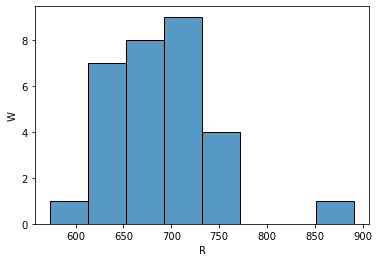

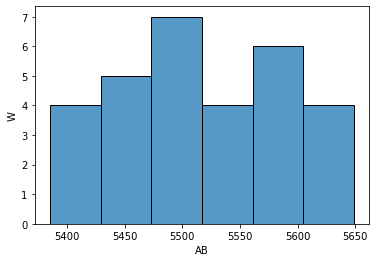

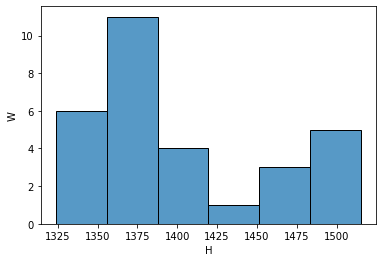

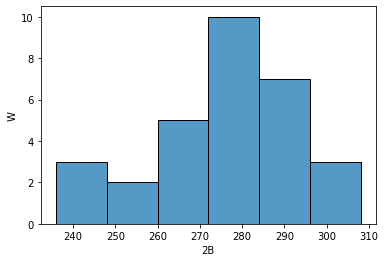

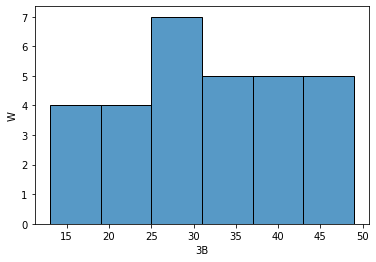

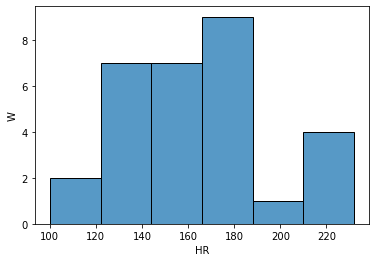

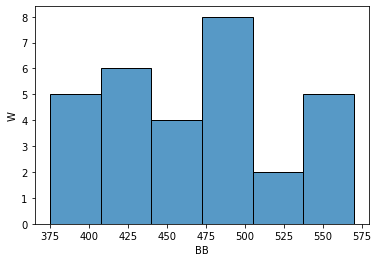

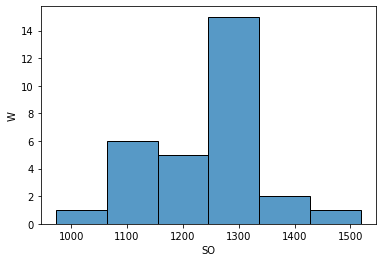

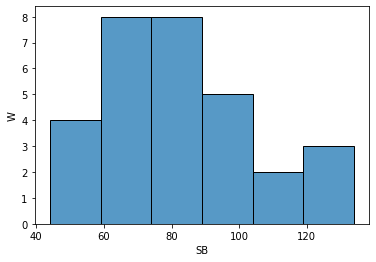

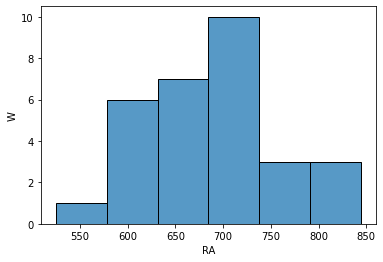

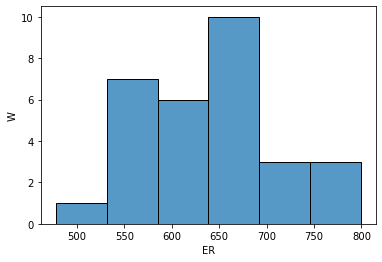

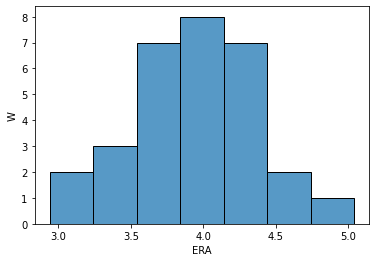

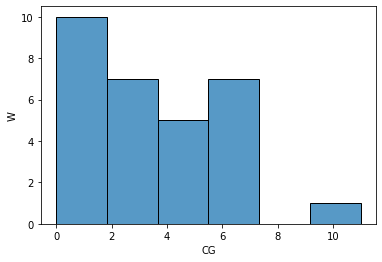

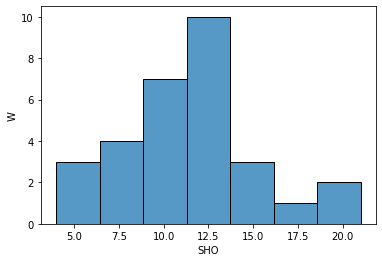

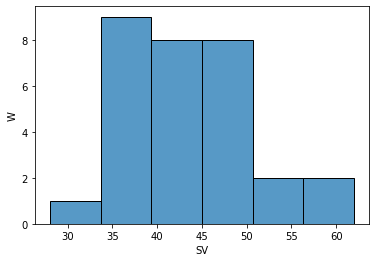

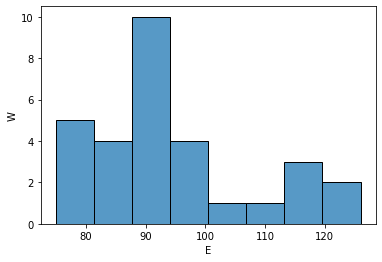

In [32]:
#to see the relationship of each column with our outputie no of win

columns=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for i in df[columns]:
    plt.figure()
    sb.histplot(df[i])
    plt.xlabel(i)
    plt.ylabel("W")
    plt.show()

<Figure size 7200x7200 with 0 Axes>

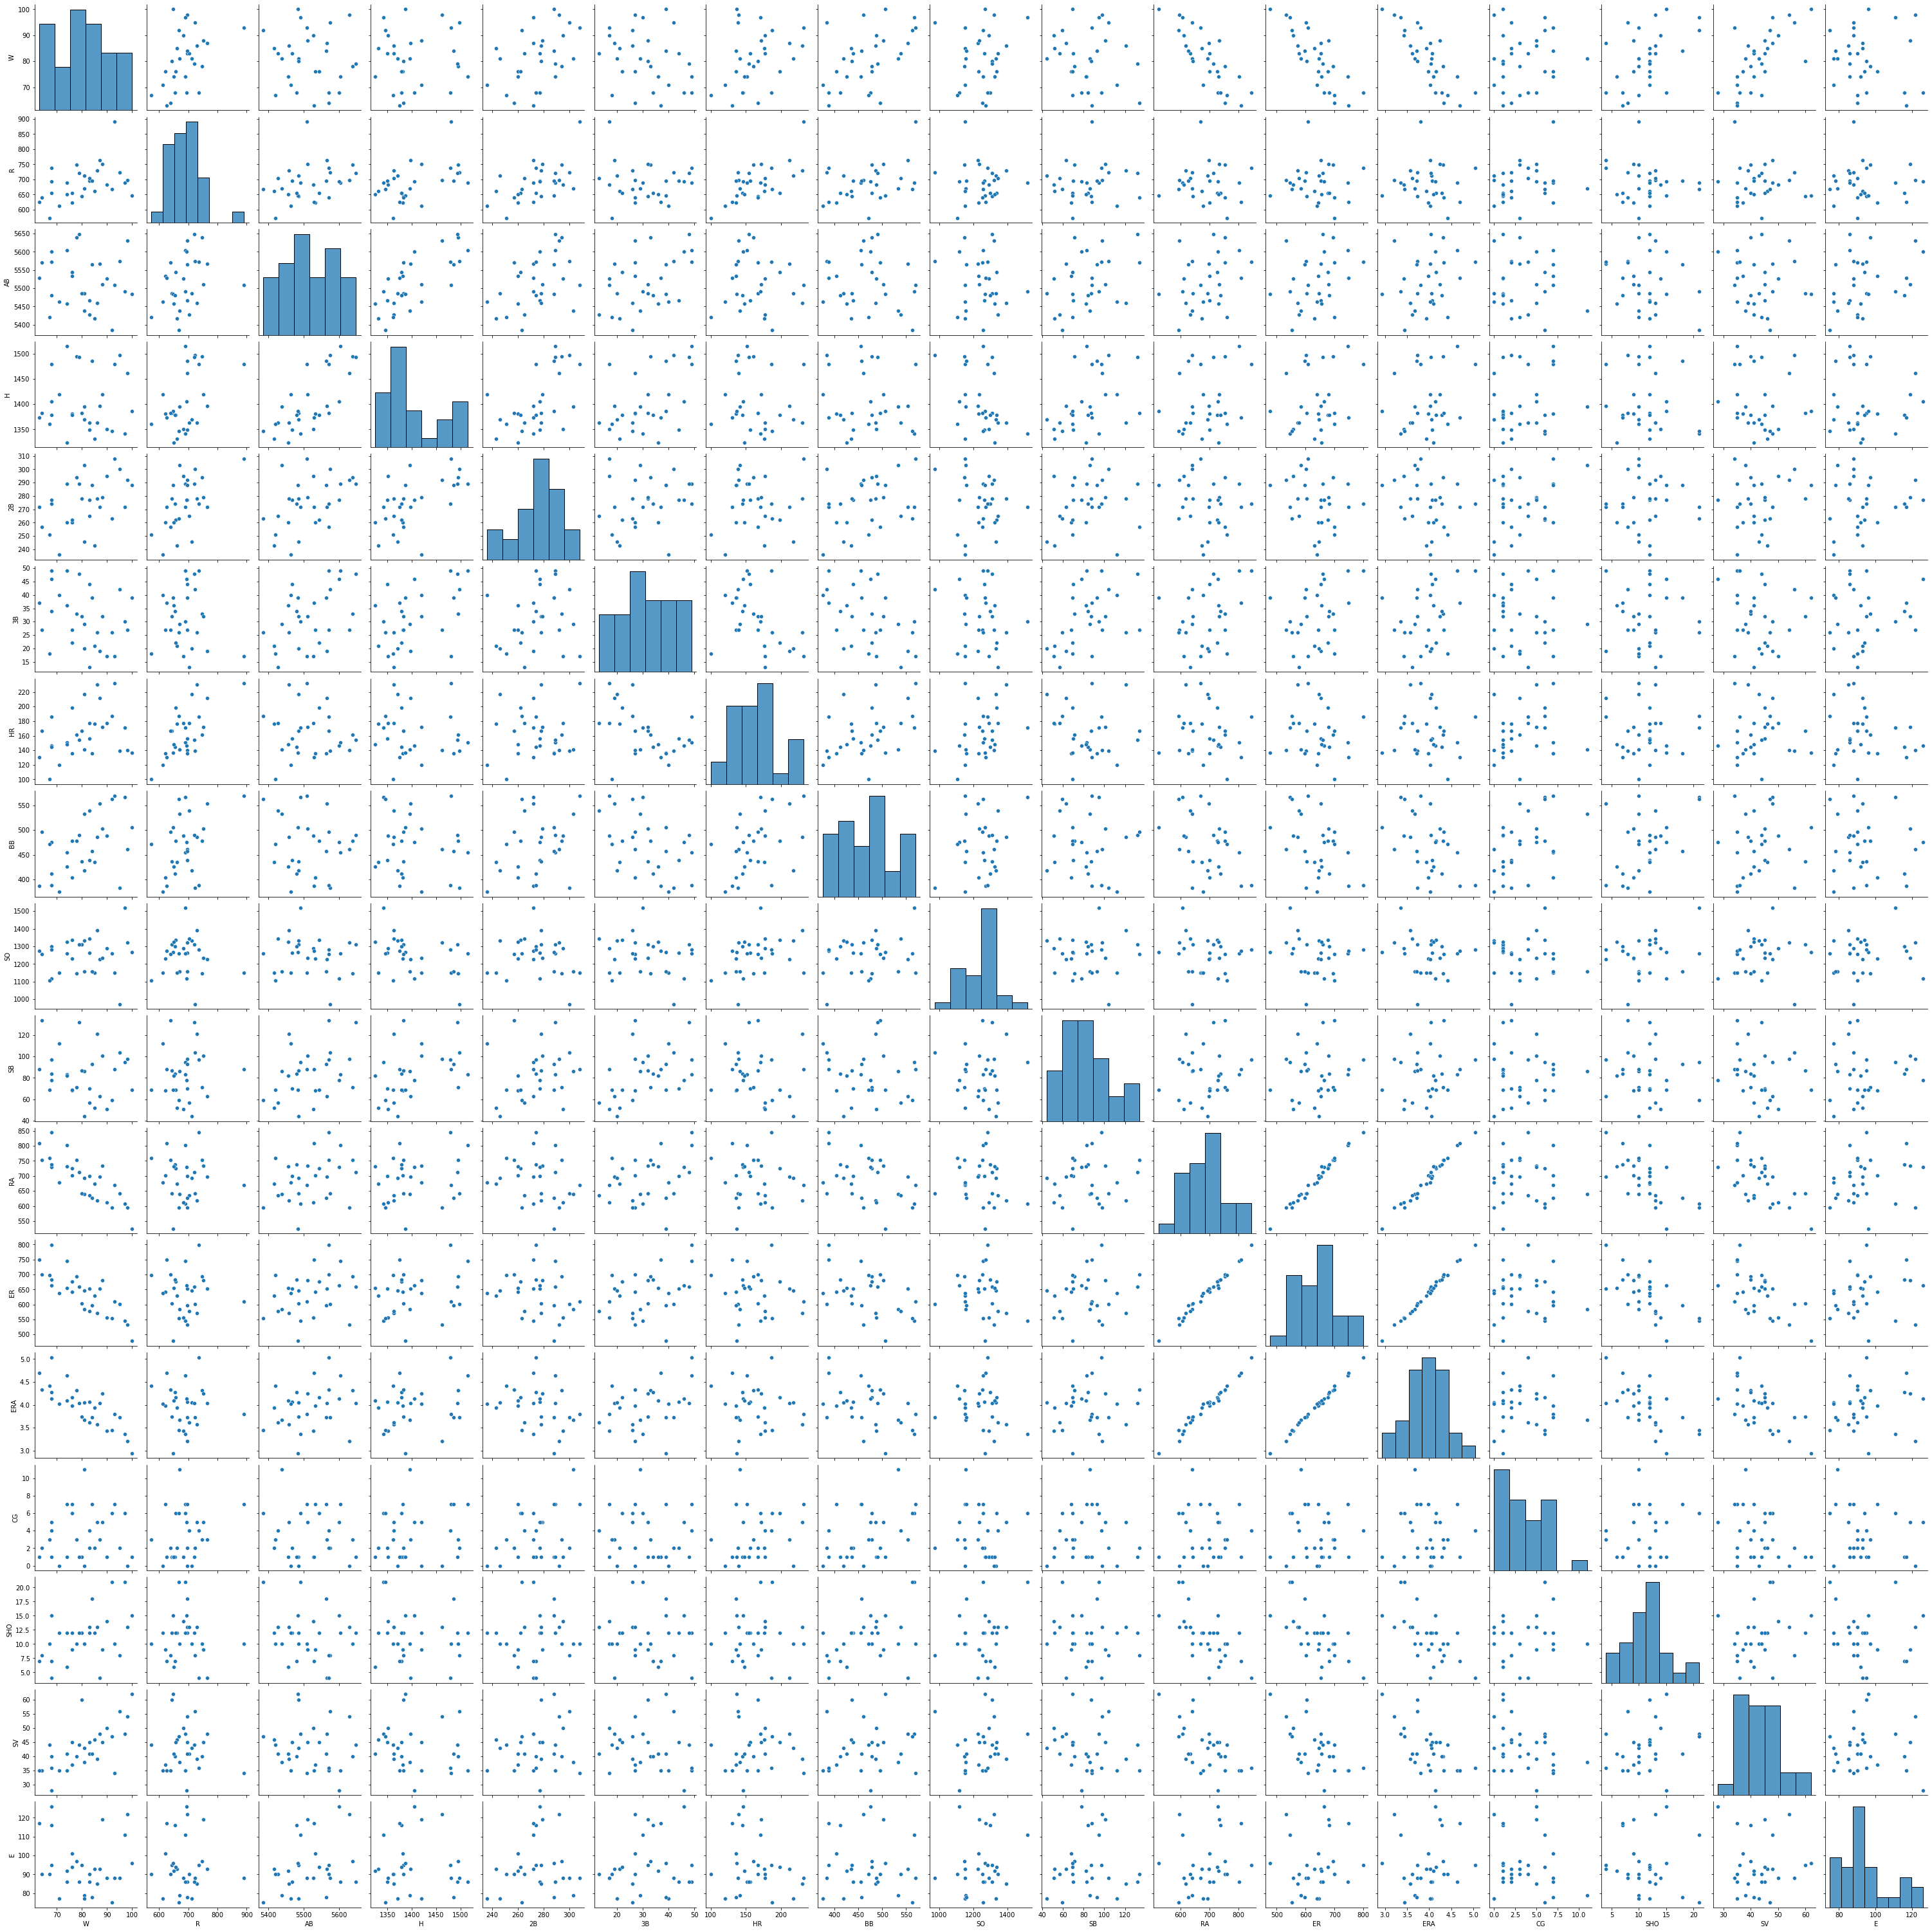

In [45]:
plt.figure(figsize=(100,100))
sb.pairplot(df)
plt.show()


While observing the pair plot it was seen that the number of win was directly affected by SV ie number of saves and inversly related to Runs Allowed, Earned Runs, Earned Run Average.
Also hits and at bats were also found to be positively related to each other.
Another finding was that ERA was influenced by  RA and ER.

In [46]:
#to find clear correlation of all the attributes
cor=df.corr()

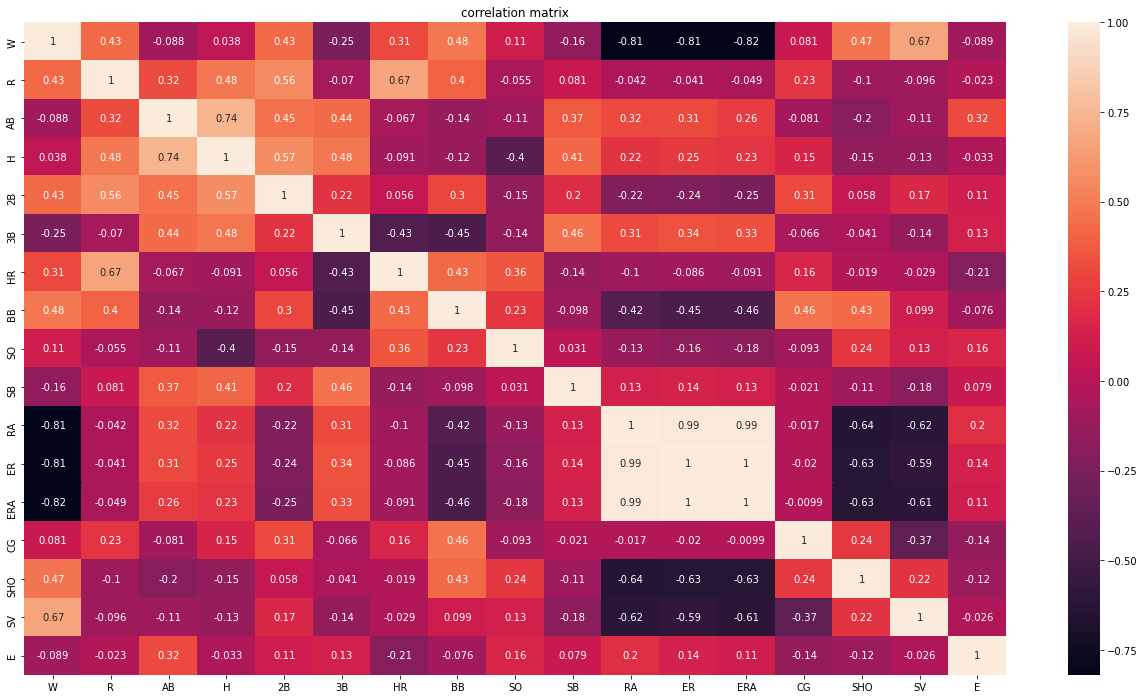

In [47]:
plt.figure(figsize=(22,12))
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show()

there is negative correlation of SHO and SV with RA,ER and ERA.

In [49]:
#to see the correclation of target column with all attributes
cor['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

Correlation data clearly shows positive correlation between win and SV,BB,SHO,R,2B,HR and negative correlation with ER,RA and ERA

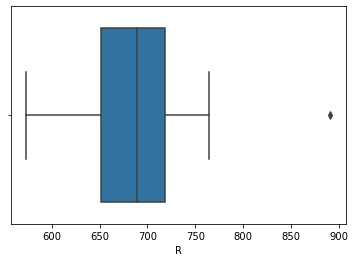

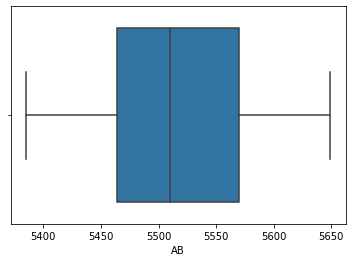

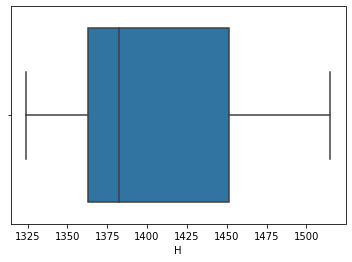

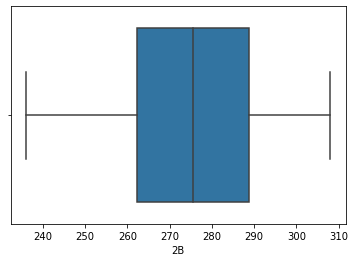

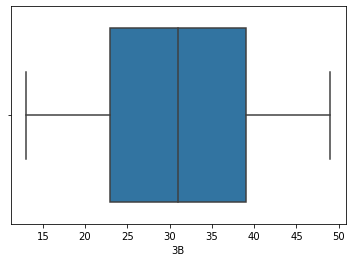

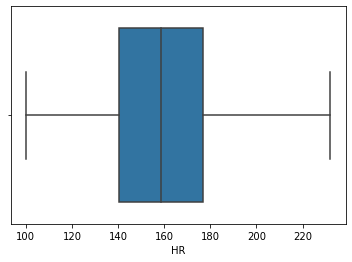

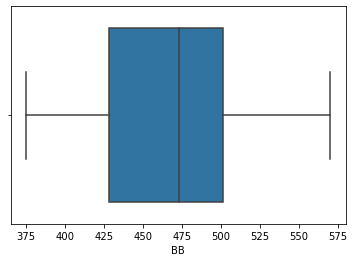

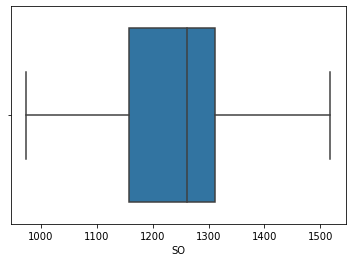

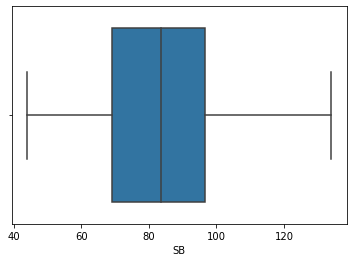

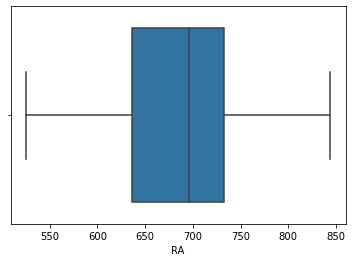

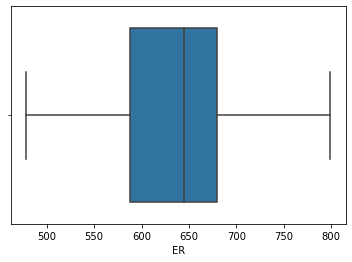

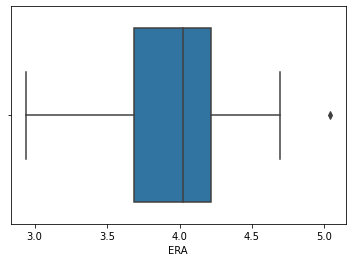

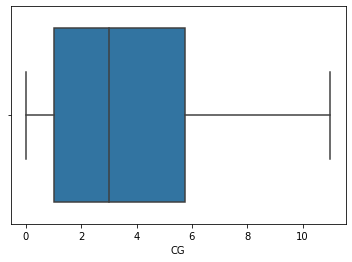

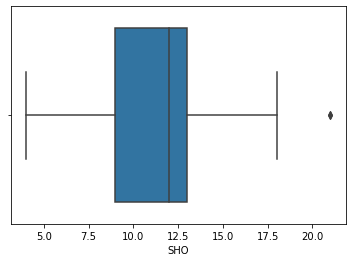

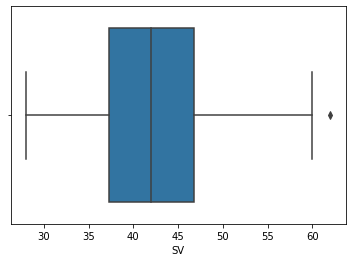

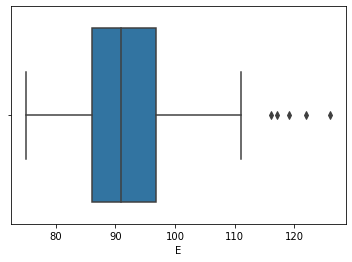

In [55]:
columns=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for i in df[columns]:
    plt.figure()
    sb.boxplot(df[i])

Boxplot method was used to see outliers.Outliers were seen in SV,SHO,E,ERA and R columns

# Outlier removal

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [58]:
new_df=df[(z<3).all(axis=1)]

In [59]:
df.shape

(30, 17)

In [60]:
new_df.shape

(29, 17)

Outliers were removed by zscore method

# Splitting of dataset

In [61]:
#splitting of data
x=new_df.iloc[:,1:]

In [67]:
y=new_df.iloc[:,0]

In [68]:
x.shape

(29, 16)

In [69]:
y.shape

(29,)

In [70]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [71]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

# checking for skewnness

In [72]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

# skewness removal

In [73]:

from sklearn.preprocessing import power_transform

In [74]:
new_df1=power_transform(x)

In [75]:
new_df1=pd.DataFrame(new_df1,columns=x.columns)

In [76]:
new_df1.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Thus skewness was removed from the data

In [77]:
x=new_df1

# Scaling of data using minmax scaler

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scale=MinMaxScaler()

In [105]:
new_df2=scale.fit_transform(x)

In [106]:
new_df2=pd.DataFrame(new_df2,columns=x.columns)

In [107]:
x=new_df2

In [108]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.762696,0.0,0.0,0.943062,0.830556,0.378454,0.048581,0.000000,0.753167,0.369803,0.387557,0.379171,0.380801,0.307357,0.879539,0.413483
1,0.605464,0.0,0.0,0.546644,0.879776,0.516196,0.368941,0.494992,0.390798,0.554977,0.549631,0.541175,0.380801,0.553751,0.613222,0.361169
2,0.460720,0.0,0.0,1.000000,0.491119,0.395362,0.843748,0.302316,0.575765,0.366649,0.334357,0.350512,1.000000,0.435918,0.400262,0.147814
3,0.224713,0.0,0.0,0.296579,0.435211,0.352711,0.172587,0.434273,0.365341,0.558100,0.518537,0.498356,0.800532,0.373171,0.366108,0.684918
4,0.567292,0.0,0.0,0.744787,1.000000,0.477032,0.454814,0.485718,0.543333,0.874215,0.837251,0.811362,0.800532,0.553751,0.294447,0.361169


# Model Building

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# choosing best random state

In [110]:
from sklearn.linear_model import LinearRegression
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lnr=LinearRegression()
    lnr.fit(x_train,y_train)
    predlnr=lnr.predict(x_test)
    r2=r2_score(y_test,predlnr)
    if r2>maxaccu:
        maxaccu=r2
        maxrs=i
print(maxaccu)
print(maxrs)

0.9215435340417796
159


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=159)

In [112]:
lnr=LinearRegression()
lnr.fit(x_train,y_train)
lnr.coef_

array([ 2.55644842e+01,  2.38031816e-13, -1.42108547e-13, -7.38408968e+00,
        7.66509410e-01, -1.09929246e+01, -4.83459474e+00,  2.95804250e+00,
       -1.34440131e+00,  4.54380092e+00,  2.50683139e+01, -6.08577285e+01,
        7.54817717e+00,  3.40643294e+00,  2.03510216e+01, -1.32966863e+00])

In [113]:
lnr.score(x_train,y_train)

0.9480257061173769

In [114]:
predlnr=lnr.predict(x_test)
print('mae_lnr',mean_absolute_error(y_test,predlnr))
print('mse_lnr',mean_squared_error(y_test,predlnr))
print('r2 score_lnr',r2_score(y_test,predlnr))

mae_lnr 2.063726117703368
mse_lnr 7.950255217099668
r2 score_lnr 0.9215435340417796


In [115]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9406066077695752

In [116]:
predrfr=rfr.predict(x_test)
print('mae_rfr',mean_absolute_error(y_test,predrfr))
print('mse_rfr',mean_squared_error(y_test,predrfr))
print('r2 score_rfr',r2_score(y_test,predrfr))

mae_rfr 5.275555555555556
mse_rfr 36.49273333333334
r2 score_rfr 0.6398743421052631


In [117]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [118]:
preddtr=dtr.predict(x_test)
print('mae_dtr',mean_absolute_error(y_test,preddtr))
print('mse_dtr',mean_squared_error(y_test,preddtr))
print('r2 score_dtr',r2_score(y_test,preddtr))

mae_dtr 6.555555555555555
mse_dtr 61.0
r2 score_dtr 0.3980263157894737


# cross validation

In [119]:
from sklearn.model_selection import cross_val_score
print ("cross val score for decision tree regressor is:",cross_val_score(dtr,x,y,scoring='r2',cv=5).mean())
print ("cross val score for linear regression is:",cross_val_score(lnr,x,y,scoring='r2',cv=5).mean())
print ("cross val score for random forest regressor is:",cross_val_score(rfr,x,y,scoring='r2',cv=5).mean())

cross val score for decision tree regressor is: -2.2652981548387694
cross val score for linear regression is: 0.376132412123686
cross val score for random forest regressor is: -0.4375175254585201


Thus linear regression will be chosen for regularisation

In [120]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Lasso regularisation

In [121]:
parameters={'alpha':[.0001,.001,.01,.1]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'alpha': 0.1}

In [122]:
ls=Lasso(alpha=.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls.coef_

array([ 14.08801581,   0.        ,   0.        ,  -0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
        -0.13155317,  -0.        ,  -8.19768582, -17.24741175,
         1.66294825,   2.79959266,  16.4600311 ,   0.85389851])

In [123]:
predls=ls.predict(x_test)
print('r2 score_ls',r2_score(y_test,predls))
print ("cross val score for Lasso is:",cross_val_score(ls,x,y,scoring='r2',cv=5).mean())

r2 score_ls 0.9114289359787336
cross val score for Lasso is: 0.5438800159655617


# Ridge regularisation

In [124]:
parameters={'alpha':[.0001,.001,.01,.1]}
rd=Ridge()
clf1=GridSearchCV(rd,parameters)
clf1.fit(x_train,y_train)
clf1.best_params_

{'alpha': 0.1}

In [125]:
rd=Ridge(alpha=0.1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
rd.coef_

array([ 1.56668329e+01,  0.00000000e+00,  0.00000000e+00, -2.04223974e+00,
        5.18967672e-01, -2.09181859e+00, -7.04864765e-03,  2.80701241e+00,
       -2.90379734e+00, -8.64044567e+00, -9.39410209e+00, -9.83495399e+00,
        3.77684408e+00,  1.75703239e+00,  1.63225940e+01,  3.38873622e+00])

In [126]:
predrd=rd.predict(x_test)
print('r2 score_ls',r2_score(y_test,predrd))
print ("cross val score for Ridge is:",cross_val_score(rd,x,y,scoring='r2',cv=5).mean())

r2 score_ls 0.877871469728305
cross val score for Ridge is: 0.4692636311597285


In [127]:
 #Lasso will be chosen as final model

# Final model

In [128]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls.coef_
predls=ls.predict(x_test)
print('r2 score_ls',r2_score(y_test,predls))

r2 score_ls 0.9114289359787336


# Saving the model

In [129]:
import joblib

In [130]:
filename='finalbaseballmodel.pkl'

In [132]:
joblib.dump(ls,'finalbaseballmodel.pkl')

['finalbaseballmodel.pkl']